In [7]:
from config import config
from models.bert import BertClassifier
from data_processing.ev_parser import create_dataloader
import os
import pickle
import matplotlib.pyplot as plt
import seaborn as sns

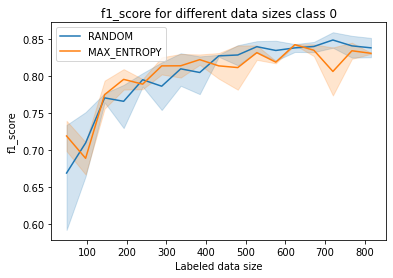

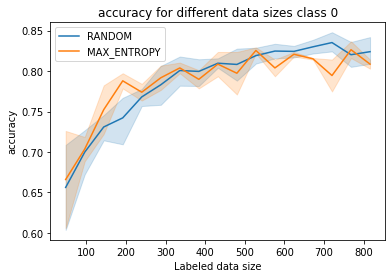

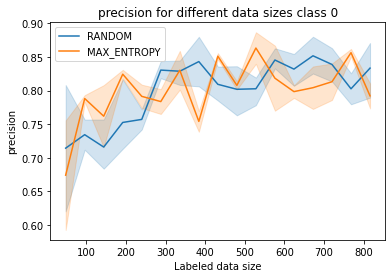

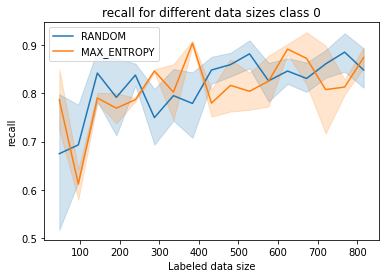

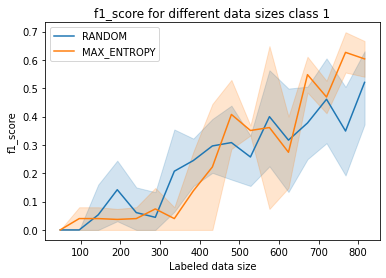

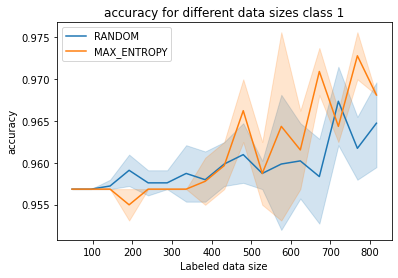

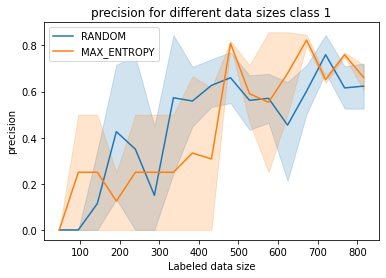

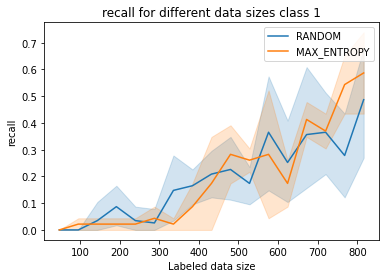

In [11]:
strategies = ['RANDOM', 'MAX_ENTROPY']
for class_index in [0,1]:
  for metric in ['f1_score', 'accuracy', 'precision', 'recall']:
    for strategy in strategies:
      results_path = os.path.join('../results/al', f'{strategy}.pkl')
      
      with open(results_path, 'rb') as f:
        results = pickle.load(f)

        sns.lineplot(x=results['split'], y=results[class_index][metric], label=strategy)
        plt.legend()
        plt.xlabel('Labeled data size')
        plt.ylabel(metric)
        plt.title(f'{metric} for different data sizes, class {class_index}')
    plt.show()

# results

In [3]:
conf = config.multilabel_base()
model = BertClassifier(config=conf.bert) 
train(config=conf, model=model)

Some weights of the model checkpoint at prajjwal1/bert-tiny were not used when initializing BertModel: ['cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.decoder.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
  0%|          | 0/1066 [00:00<?, ?it/s]

Epoch 0/1


 20%|██        | 214/1066 [01:52<07:26,  1.91it/s, loss=0.697]


KeyboardInterrupt: 

In [ ]:
import torch
import torch.nn as nn

validation_loader = create_dataloader(conf, 'test')
criterion = nn.BCEWithLogitsLoss()

model.eval() 
val_loss = 0
with torch.no_grad():
  for batch in validation_loader:
    output = model(input_id=batch['input_ids'], mask=batch['attention_mask'])
    val_loss += criterion(output, batch['label'])
# total loss - divide by number of batches
val_loss = val_loss / len(validation_loader)
print('Test Loss: {:.4f}'.format(val_loss))

Validation Loss: 0.6725
